<a href="https://colab.research.google.com/github/ttatjanaa/ttatjanaa/blob/main/%D0%94%D0%97_10_%D0%90_B_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ 10 Python A/B
В этом задании вам необходимо использовать набор данных ad.csv.

1) Датасет содежит 2 столбца: объявление (A/B) и действие (0/1).

2) Вам необходимо сформулировать гипотезу, провести ее проверку (пользуясь классическим подходом) и ответить на вопрос какое из объявлений лучше.

Новый раздел
1. Контекст задачи
Команда ux-дизайнеров работает над улучшением рекламного объявления. Текущая конверсия составляет в среднем в течении года 30%, но будет отлично, если данный коэффициент повысится до 40%. То есть новый дизайн объявления будет успешным, если оно повысит коэф-т конверсии до 40%.

2. Формулировка гипотезы
Hо: p(a) = p(b)

H1: p(a) ≠ p(b)

где p(a) и p(b) означают соответственно коэффициент конверсии старого и нового дизайна. Мы также установим уровень доверия 95%, то есть α = 0,05

Значение α - это порог, который устанавливаем и делаем вывод: «Если вероятность наблюдения за результатом (p-значением) ниже α, то мы отвергаем гипотезу Hо». Поскольку наша α=0,05 (что указывает на вероятность 5%), наша уверенность (1 — α) составляет 95%.

В результате решения данной задачи, мы хотим быть на 95% уверены, что новый дизайн статистически отличается от коэффициента конверсии старого дизайна, прежде чем отклонить нулевую гипотезу Ho.

3. Набор данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ad.csv')

In [ ]:
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


Описание набора данных:

A - контрольная группа

B - тестовая группа

action:

0 - не было покупки

1 - была покупка

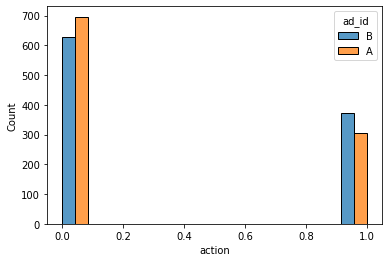

In [ ]:
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge")

Промежуточные выводы:

Распределение данных дискретное, которое принимает на вход только два значения: 0 и 1
4. Статистика набора данных
Чтобы посмотреть результат по сумме кликов по группам, можно использовать pivot_table

DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) Create a spreadsheet-style pivot table as a DataFrame.

Parameters:

values: column to aggregate, optional

index: column, Grouper, array, or list of the previous

columns: column, Grouper, array, or list of the previous

aggfunc: function, list of functions, dict, default numpy.mean

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html?highlight=pivot_table

In [ ]:
summary_df = df.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum)

In [ ]:
summary_df

,action
ad_id,
A,304
B,372


Анонимная функция lambda

Анонимные функции могут содержать лишь одно выражение, но и выполняются они быстрее. Анонимные функции создаются с помощью конструкции lambda. Кроме этого, их не обязательно присваивать переменной, как делали мы с конструкцией def func().

Ниже пример:

In [ ]:
def length(x):
    return len(x)

lambda_def = lambda x: len(x)

In [ ]:
ll = [1,2,3]
print('Длина массива через def = ', length(ll))
print('Длина массива через lambda = ', lambda_def(ll))

Длина массива через def =  3
Длина массива через lambda =  3


Добавим к сводной таблице другие статистические характеристики:

In [ ]:
summary_df['total_count'] = df.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x))

summary_df['conversion_rate'] = df.pivot_table(values='action', index='ad_id') #по-умолчанию среднее

numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=, *, where=) Compute the standard deviation along the specified axis. ddof - дельта степени свободы (принимаем за 0 без смещения, тк данная переменная - это делитель , используемый в вычислениях, равен N - ddof). Тк выборка большая, то значимость не придаем.

https://numpy.org/doc/stable/reference/generated/numpy.std.html

scipy.stats.sem (a, axis=0, ddof=1, nan_policy='propagate') Compute standard error of the mean. https://scipy.github.io/devdocs/reference/generated/scipy.stats.sem.html?highlight=sem#scipy.stats.sem

In [ ]:
summary_df['std_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0))
summary_df['se_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0))

In [ ]:
summary_df

,action,total_count,conversion_rate,std_p,se_p
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


Промежуточные выводы:

1.Дизайн рекламы B лучше, чем A (conversion_rate B > conversion_rate A)

2.Отрисуем данную пропорциональность на графике ниже

4. Визуализация промежуточных выводов

seaborn.barplot(, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7ff320f315e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, *kwargs)

https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot

Text(0, 0.5, 'Коэф-т конверсии')

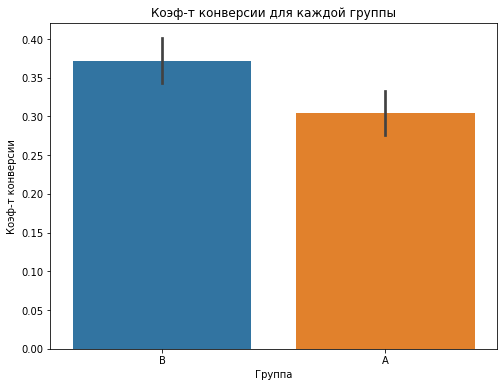

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['ad_id'], y=df['action'])

plt.title('Коэф-т конверсии для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэф-т конверсии')

Промежуточные выводы:

Статистически ли значима данная разница?

5. Проверка гипотезы

Используем критерий Z-статистики для конверсии
Пришло время оценить, насколько разница в конверсии, которую мы получили на собранных данных, статистически значима. То есть, можем ли мы быть уверены, что разница, которую мы наблюдаем — неслучайная.

Для такого анализа используют статистические критерии — они бывают разными для разных данных.

Z-статистика — критерий, который подходит для оценки конверсии, поскольку данные конверсии дискретные: пользователь либо совершил покупку, и мы присвоили ему 1, либо не совершил и мы присвоили ему 0.

Функция, которая нам нужна, чтобы использовать Z-статистику, есть в библиотеке — statsmodels. Мы импортируем из нее объект stats.proportion, который позволяет считать пропорции.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [ ]:
control_results = df[df['ad_id'] == 'A']['action']
test_results = df[df['ad_id'] == 'B']['action']

Статистический критерий вернет нам значение p-value, которое поможет оценить: есть ли статистическая значимость в разнице конверсий, которую показывает наш эксперимент.

Посчитаем p-value

Передаем функции proportions_ztest параметры:

1.Количество покупок в наших группах — значения колонки successes

2.Количество наблюдений — всех пользователей из колонки nobs

Так как функция возврщает три значения, мы сразу создадим три переменные через запятую:

-- z_stat — статистика под капотом критерия

-- pval — интересующее нас значение p-value

-- table — таблица сопряженности: она помогает исследовать связи в распределениях, но в данной задаче она нам не понадобится

In [ ]:
nobs = [control_results.count(), test_results.count()]
successes = [control_results.sum(), test_results.sum()]
z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


Так как ни один статистический критерий не дает 100% уверенности, мы зададим ему порог 5% для ошибки первого рода — то есть согласимся, что 5% наших наблюдений будут ошибочными.

In [ ]:
alpha = 0.05

p-value — это фактическая вероятность попасть в ошибку первого рода на наших данных, если мы отклоним нулевую гипотезу. Давайте сравним p-value c желаемым уровнем точности нашего эксперимента.

--Если p-value меньше порога ошибки первого рода — результат эксперимента можно считать статзначимым

--Если p-value больше — мы будем вынуждены признать разницу в значениях тестовой и контрольной группы случайной

In [ ]:
print(pval < alpha)

True


Промежуточные выводы:

1. Тк p-value < 0.05, то отклоняем нулевую гипотезу, что означает - новый дизайн рекламы работал значительно иначе, чем старый
2. Если посмотрим на доверительные интервалы, то для нового дизайна В конверсия включает/не включает таргет и базовое значение коэф-та конверсии

Для расчета доверительных интервалов воспользуемся методом proportion_confint

In [ ]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371


Промежуточные выводы:

3. В результате нового дизайна B, можем ждать улучшений до 40% (подъем максимум на 10%) - новый дизайн даст улучшения

AB тестирование на реальном датасете

In [ ]:
data = pd.read_csv('ab_data.csv', index_col = 0)

In [ ]:
data.head()

,user_id,test_group,created_order_in_3_days,order_sum,geo_group,marketing_group
39152,1005040,control,1,5194.269328,msk,target_direct
19680,1069723,test,0,NaN,msk,target_direct
6738,1064653,test,0,NaN,msk,target_direct
12480,1063744,test,1,18940.000000,msk,organic
6626,1022929,control,0,NaN,spb,social_media


В колонке created_order_in_3_days

--0 — для пользователей, которые ничего не купили в течение трех дней

--1 — для тех, кто совершил покупку в отведенное окно конверсии

order_sum - сумма покупки пользователя

geo_group - из какой страны, города, района наши пользователи

marketing_group - маркетиноговый канал привлечения: платный трафик, соцсети, органический, рекламная акция

В колонке test_group у каждого пользователя проставлен статус: был он в тестовой группе или в контрольной.

Посчитаем для каждой группы:

--количество пользователей 'user_id': 'count'
--сумма единиц — количество пользователей, которые совершили покупку в течении 3х дней 'created_order_in_3_days': 'sum'

И добавим новый столбец с конверсией в обеих группах. Количество купивших разделим на общее количество в группе.

In [ ]:
metrics = data.groupby('test_group', as_index= False).agg({'user_id': 'count', 'created_order_in_3_days': 'sum'})
metrics['conversion'] = round(metrics['created_order_in_3_days']/metrics['user_id']*100, 2)
metrics

,test_group,user_id,created_order_in_3_days,conversion
0,control,5062,1594,31.49
1,test,4938,1583,32.06


Для простоты решения задачи будем считать, что пользователи в каждом сегменте распределены равномерно!

Мы хотим быстро посмотреть распределение сегментов в обеих группах. Для этого напишем функцию, которая строит столбиковую диаграмму по сегментам для каждой группы.

--по оси x график выводит сегмент, который мы передадим

--по оси y график выводит количество пользователей

--в данных мы сгруппируем количество пользователей по тестовой и контрольной группе

In [ ]:
def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['user_id'].count().reset_index()
        sns.catplot(x = segment, 
                    y = 'user_id', 
                    hue = test_factor,
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 4,
                    aspect = 1.5) 

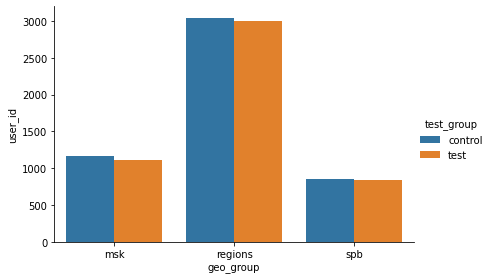

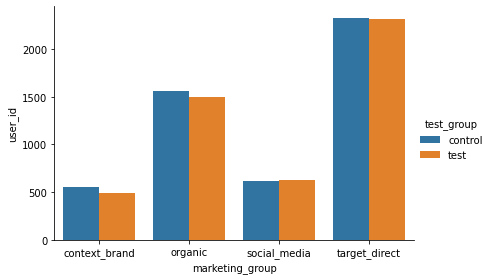

In [ ]:
plot_segments_distribution(data, ["geo_group", "marketing_group"], "test_group")

Используем критерий Хи-квадрат для конверсии
Мы поняли, что собранные данные правильно распределены по сегментам. Теперь пришло время оценить, насколько разница в конверсии, которую мы получили на собранных данных, статистически значима. То есть, можем ли мы быть уверены, что разница, которую мы наблюдаем — неслучайная.

Для такого анализа используют статистические критерии — они бывают разными для разных данных.

Хи-квадрат — критерий, который подходит для оценки конверии, поскольку данные конверсии дискретные: пользователь либо совершил покупку, и мы присвоили ему 1, либо не совершил и мы присвоили ему 0.

Функция, которая нам нужна, чтобы использовать хи-квадрат, есть в библиотеке — statsmodels. Мы импортируем из нее объект stats.proportion, который позволяет считать пропорции.

In [ ]:
import statsmodels.stats.proportion as proportion

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm

Статистический критерий вернет нам значение p-value, которое поможет оценить: есть ли статистическая значимость в разнице конверсий, которую показывает наш эксперимент.

Посчитаем p-value
Передаем функции proportions_chisquare( ) параметры:

Количество покупок в наших группах — значения колонки 'created_order_in_3_days'
Количество наблюдений — всех пользователей из колонки 'user_id'
Так как функция возврщает три значения, мы сразу создадим три переменные через запятую:

chi2stat — статистика под капотом критерия
pval — интересующее нас значение p-value
table — таблица сопряженности: она помогает исследовать связи в распределениях, но в данной задаче она нам не понадобится

In [ ]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics['created_order_in_3_days'], metrics['user_id'])

Так как ни один статистический критерий не дает 100% уверенности, мы зададим ему порог 5% для ошибки первого рода — то есть согласимся, что 5% наших наблюдений будут ошибочными.

In [ ]:
alpha = 0.05

p-value — это фактическая вероятность попасть в ошибку первого рода на наших данных, если мы отклоним нулевую гипотезу. 
Давайте сравним p-value c желаемым уровнем точности нашего эксперимента.

--Если p-value меньше порога ошибки первого рода — результат эксперимента можно считать статзначимым

--Если p-value больше — мы будем вынуждены признать разницу в значениях тестовой и контрольной группы случайной

In [ ]:
print(pval < alpha)

False


Используем критерий Z-статистики для конверсии

In [ ]:
metrics

,test_group,user_id,created_order_in_3_days,conversion
0,control,5062,1594,31.49
1,test,4938,1583,32.06


In [ ]:
z_stat, pval = proportion.proportions_ztest(metrics['created_order_in_3_days'], metrics['user_id'])

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -0.6099242658711096
p-value: 0.5419119772353791


In [ ]:
print(pval < alpha)

False


Статистически значимой разницы в конверсии не обнаружено, так как p-value выше выбранного порога ошибки первого рода

In [ ]:
data.head()

,user_id,test_group,created_order_in_3_days,order_sum,geo_group,marketing_group
39152,1005040,control,1,5194.269328,msk,target_direct
19680,1069723,test,0,NaN,msk,target_direct
6738,1064653,test,0,NaN,msk,target_direct
12480,1063744,test,1,18940.000000,msk,organic
6626,1022929,control,0,NaN,spb,social_media


Используем Bootstrap для среднего чека

Прежде чем делать выводы, проверим, нет ли значимого изменения среднего чека, ведь конверсия и средний чек — метрики, которые тесно связаны: если улучшить одну — другая может стать хуже.

Для среднего чека не подходит хи-квадрат, так как эта метрика не дискретная: у среднего чека большой разброс значений на разных пользователей, которые редко распределены нормально. Поэтому т-тест тоже не подходит.

Здесь поможет метод bootstrap.

Он уже реализован в библиотеке bootstrapped — скачаем ее:

In [ ]:
!pip install bootstrapped

  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13954 sha256=1b146fe6419e504282ad78d1920ae169748e0a12e752ba8eb0d012049b4fb6e7
  Stored in directory: /root/.cache/pip/wheels/15/55/6a/9a722f067ac4c3dfab359ed2ec7906b9cc6649156d9886bd59
Successfully built bootstrapped


In [ ]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

Нам понадобится функция bootstrap_ab. Чтобы подготовить данные, давайте посмотрим, какие аргументы она принимает:

--bs.bootstrap_ab

Первый аргумент — test — массив с данными тестовой группы.

Наши данные в датафрейме data — не подходят, так как в них тестовая и контрольная группы вместе. Кроме того, есть пользователи без покупок — их не нужно учитывать в подсчете среднего чека.

--отделим только тестовых пользователей
--удалим пустые значения, то есть пользователей, не сделавших покупку
--.values превратит серию в массив
Массив — это структура данных, которая похожа на списки. Но в отличие от них массивы хранят только данные одного типа. Например, только строки или только числовые данные.

In [ ]:
test = data[data['test_group'] == 'test']['order_sum'].dropna().values

In [ ]:
test

array([18940.        , 14982.        ,  5384.54399441, ...,
        4577.        ,  6674.        ,  6085.        ])

Второй аргумент — ctrl — массив с данными контрольной группы.

--отделим только пользователей из контрольной группы

--удалим пустые значения, то есть пользователей, не сделавших покупку

--.values превратит серию в массив

In [ ]:
ctrl = data[data['test_group'] == 'control']['order_sum'].dropna().values

In [ ]:
ctrl

array([5194.26932826, 5348.        , 5715.        , ..., 6928.        ,
       4794.        , 4919.        ])

Также нам понадобятся аргументы:

stat_func = bs_stats.mean — что мы хотим исследовать. В нашем случае — среднее значение

compare_func = bs_compare.difference— как мы хотим исследовать. В нашем случае — хотим взять разницу между группами

return_distribution = True — вернем набор разниц, который функция получает в результате всех итераций

Чтобы сохранить то, что возвращает функция, запишем результат ее работы в переменную boot_results

In [ ]:
boot_results = bs.bootstrap_ab(test = test, ctrl = ctrl
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

Мы получили массив разниц в средних чеках между нашими группами.

In [ ]:
boot_results

array([-119.63235146,  334.63158227,  106.27649623, ...,  409.10604158,
        486.29509468,  487.29127703])

Доверительный интервал
Значение среднего чека, которое мы получили для обеих групп, верно только для тех групп пользователей, которые пришли в течение эксперимента. Если бы в эксперименте участвовали похожие, но другие пользователи — значение среднего чека немного, но отличалось бы. Понять, насколько могут отличаться похожие группы в нашем эксперименте, поможет доверительный интервал.

Уровень доверия обычно устанавливают в 95%. То есть можно сказать, что в 95% аналогичных экспериментов конверсия будет колебаться внутри этого интервала.

Зададим границы доверительного интервала от 2,5 до 97,5 — между ними как раз 95%.

In [ ]:
borders = np.percentile(boot_results, [1.5, 96.5])
borders

array([-154.76010707,  473.69705816])

Используем полученный выше массив в переменной boot_results, чтобы выяснить доверительный интервал — то есть тот интервал колебаний среднего чека похожих экспериментов.

Если ноль не входит в доверительный интервал, аналогично условию p-value < alpha — разница значима.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


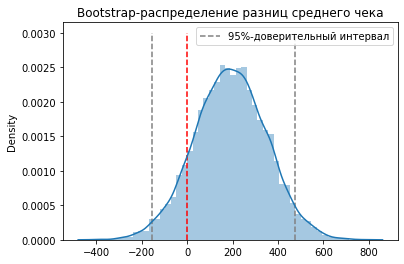

In [ ]:
sns.distplot(boot_results) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

Результат
Статистически значимой разницы в среднем чеке не обнаружено, так как 0 входит в доверительный интервал разницы между группами